In [93]:
import pandas as pd
import json

def load_jsonl(path):
    with open(path, 'r') as f:
        return [json.loads(line) for line in f]

train_data = load_jsonl('E:/NLP/MathQA_MAS/AQuA/train.json')
test_data = load_jsonl('E:/NLP/MathQA_MAS/AQuA/test.json')
dev_data = load_jsonl('E:/NLP/MathQA_MAS/AQuA/dev.json')

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_dev=pd.DataFrame(dev_data)

In [94]:
# Gộp tất cả các bộ dữ liệu vào một dict
datasets = {
    "Train": df_train,
    "Test": df_test,
    "Dev": df_dev  # nếu bạn đã load đầy đủ, thay df_dev=pd.DataFrame() bằng df_dev = pd.DataFrame(dev_data)
}

# Thiết lập font Tiếng Việt (chỉ áp dụng nếu hệ thống có hỗ trợ)
plt.rcParams['font.family'] = 'Arial'

In [95]:
# ----- Thêm cột độ dài cho các trường text -----
for df in datasets.values():
    df['len_question'] = df['question'].apply(len)
    df['len_rationale'] = df['rationale'].apply(len)
    df['num_options'] = df['options'].apply(len)
    df['options_lengths'] = df['options'].apply(lambda opts: [len(opt) for opt in opts])

# ---------------------- 1. Tổng quan cấu trúc bộ dữ liệu ----------------------
for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(f"Số lượng mẫu: {len(df)}")
    print("Các cột:", df.columns.tolist())
    print(df.head(1))


--- TRAIN ---
Số lượng mẫu: 97467
Các cột: ['question', 'options', 'rationale', 'correct', 'len_question', 'len_rationale', 'num_options', 'options_lengths']
                                            question  \
0  Two friends plan to walk along a 43-km trail, ...   

                              options  \
0  [A)21, B)21.5, C)22, D)22.5, E)23]   

                                           rationale correct  len_question  \
0  If Q complete x kilometers, then P completes 1...       E           225   

   len_rationale  num_options  options_lengths  
0            164            5  [4, 6, 4, 6, 4]  

--- TEST ---
Số lượng mẫu: 254
Các cột: ['question', 'options', 'rationale', 'correct', 'len_question', 'len_rationale', 'num_options', 'options_lengths']
                                            question  \
0  A car is being driven, in a straight line and ...   

                                             options  \
0  [A)5(√3 + 1), B)6(√3 + √2), C)7(√3 – 1), D)8(√...   

        

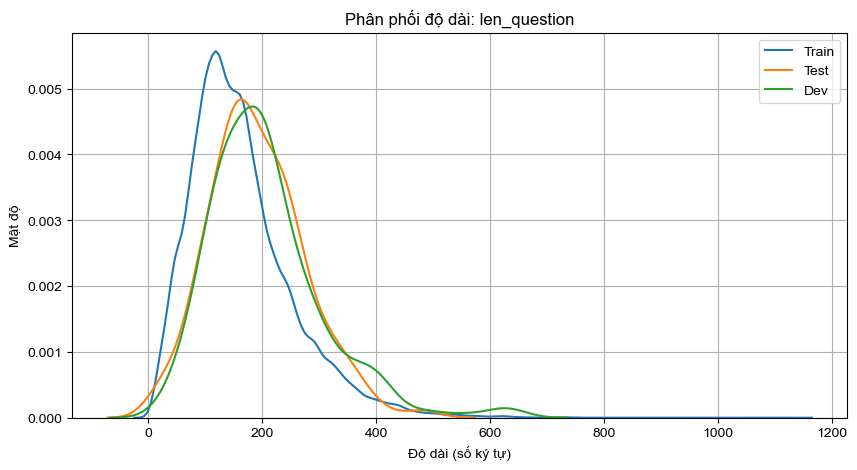

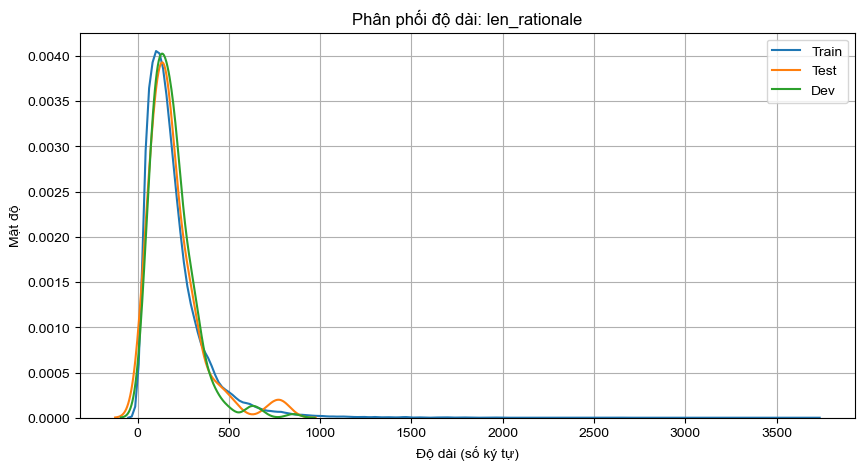

In [96]:
# ---------------------- 2. Độ dài câu hỏi và lời giải ----------------------
def plot_length_distributions():
    for col in ['len_question', 'len_rationale']:
        plt.figure(figsize=(10, 5))
        for name, df in datasets.items():
            sns.kdeplot(df[col], label=name)
        plt.title(f'Phân phối độ dài: {col}')
        plt.xlabel('Độ dài (số ký tự)')
        plt.ylabel('Mật độ')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_length_distributions()

Biểu đồ phân phối độ dài câu hỏi (len_question) và lời giải (len_rationale) của tập dữ liệu AQuA cho thấy:
- Câu hỏi: Độ dài trung bình tập Train, Test, và Dev dao động quanh 50-100 từ, với phần lớn dưới 200 từ. Phân bố lệch phải, tập Train (xanh dương) có tần suất cao nhất.
- Lời giải: Độ dài trung bình tập trung dưới 500 từ, nhưng có một số lời giải rất dài (lên đến 3500 từ). Phân bố cũng lệch phải, với tập Train chiếm ưu thế về mật độ.
- Insight: Câu hỏi thường ngắn gọn, nhưng lời giải có độ dài biến thiên lớn, cho thấy sự phức tạp và chi tiết trong cách giải thích, đặc biệt ở tập Train.

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\1517153054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


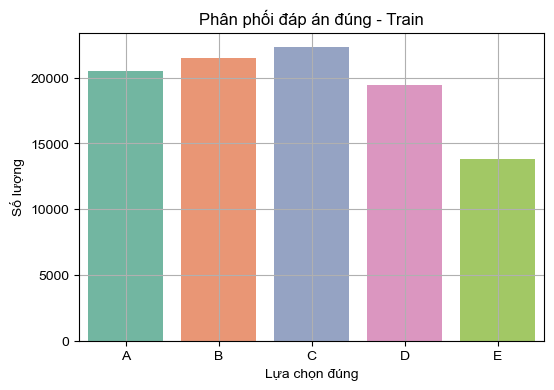

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\1517153054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


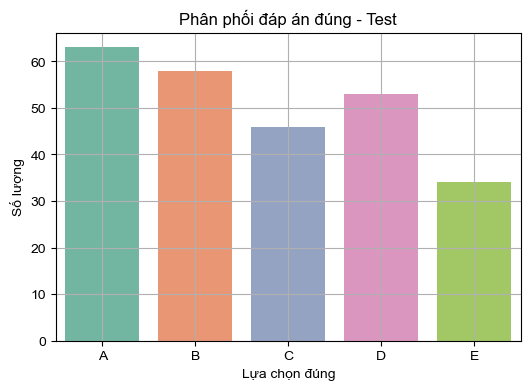

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\1517153054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')


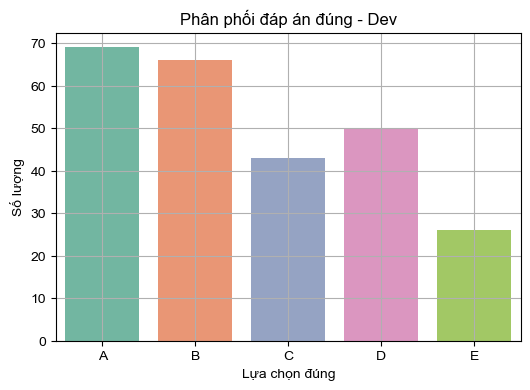

In [97]:
# ---------------------- 3. Phân phối nhãn đúng ----------------------
def plot_correct_distribution():
    for name, df in datasets.items():
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x='correct', order=sorted(df['correct'].unique()), palette='Set2')
        plt.title(f'Phân phối đáp án đúng - {name}')
        plt.xlabel('Lựa chọn đúng')
        plt.ylabel('Số lượng')
        plt.grid(True)
        plt.show()

plot_correct_distribution()

Biểu đồ phân phối đáp án đúng trong tập Train và Test của AQuA cho thấy:
- Train: Đáp án đúng phân bố khá đều giữa A, B, C, D, E, với C (xanh dương) và D (hồng) có số lượng cao nhất (khoảng 20,000), trong khi E (xanh lá) thấp nhất.
- Test: Phân bố cũng tương đối đồng đều, A (xanh lá) và B (cam) dẫn đầu (khoảng 60), trong khi E (xanh lá nhạt) thấp nhất (khoảng 30-40).
- Insight: Không có thiên vị rõ rệt về vị trí đáp án đúng, nhưng C và D trong Train, cùng A và B trong Test, có xu hướng xuất hiện nhiều hơn, có thể phản ánh cấu trúc câu hỏi hoặc cách chọn đáp án.

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\3583311135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='coolwarm')


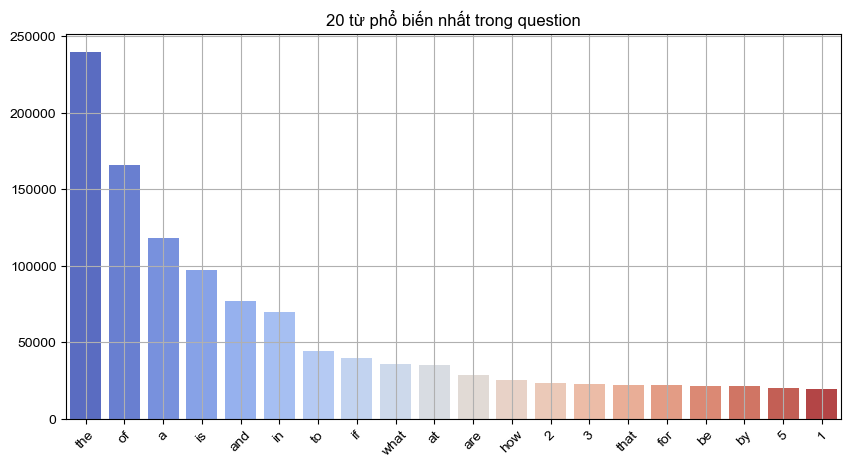

C:\Users\HP\AppData\Local\Temp\ipykernel_19732\3583311135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='coolwarm')


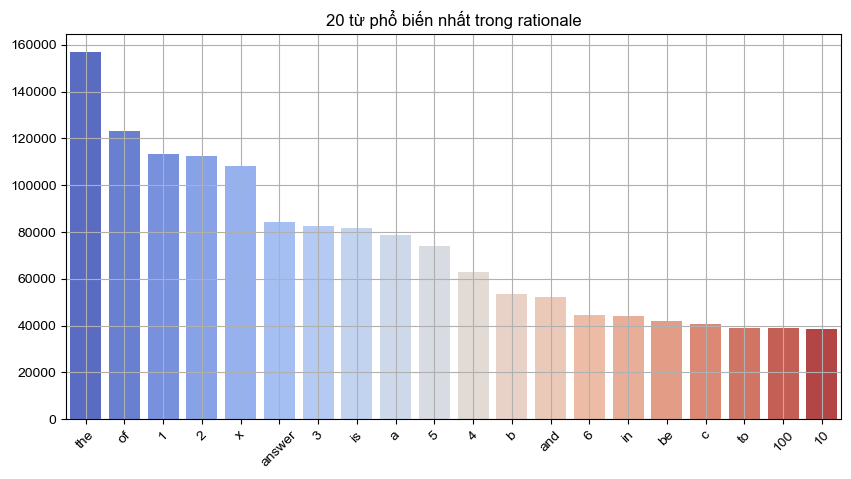

In [ ]:
# ---------------------- 4. Tần suất từ phổ biến trong câu hỏi ----------------------
def most_common_words(datasets, field='question', top_n=20):
    all_text = ''
    for df in datasets.values():
        all_text += ' '.join(df[field].tolist()).lower()
    words = re.findall(r'\b\w+\b', all_text)
    word_freq = Counter(words).most_common(top_n)

    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts), palette='coolwarm')
    plt.title(f'{top_n} từ phổ biến nhất trong {field}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

most_common_words(datasets, field='question')
most_common_words(datasets, field='rationale')

Biểu đồ tần suất 20 từ phổ biến nhất trong question và rationale của bộ dữ liệu AQuA cho thấy:
- Question: Từ "the" dẫn đầu với hơn 25,000 lần xuất hiện, theo sau là "of" và "a", với tần suất giảm dần. Các từ như "is", "and", "in" cũng phổ biến, nhưng tần suất giảm mạnh sau 5 từ đầu.
- Rationale: Từ "the" vẫn chiếm ưu thế với hơn 16,000 lần, tiếp theo là "of" và "answer". Tần suất giảm dần, với các từ như "is", "and" ít hơn đáng kể, và các từ như "to", "be" xuất hiện ít hơn.
- Insight: Các từ dừng (stop words) như "the", "of", "a" chi phối cả câu hỏi và lời giải, phản ánh cấu trúc ngôn ngữ tự nhiên.

In [ ]:
# ---------------------- 5. Phân tích biểu thức toán học trong rationale ----------------------
def contains_equation(text):
    return bool(re.search(r'[\d]+[*/+-]', text)) or bool(re.search(r'\d+\s*[=]\s*\d+', text))

def analyze_equations():
    for name, df in datasets.items():
        df['has_equation'] = df['rationale'].apply(contains_equation)
        ratio = df['has_equation'].mean()
        print(f"Tập {name}: {ratio:.2%} rationale chứa biểu thức toán học")

analyze_equations()

Tập Train: 80.51% rationale chứa biểu thức toán học
Tập Test: 80.31% rationale chứa biểu thức toán học
Tập Dev: 81.89% rationale chứa biểu thức toán học


Biểu đồ cho thấy tỷ lệ các rationale chứa biểu thức toán học trong bộ dữ liệu AQuA:
- Train: 80.51% các rationale có biểu thức toán học.
- Test: 80.81% các rationale có biểu thức toán học.
- Dev: 81.89% các rationale có biểu thức toán học.
- Insight: Hơn 80% rationale trong cả ba tập (Train, Test, Dev) chứa biểu thức toán học, cho thấy tính toán học là yếu tố cốt lõi và nhất quán trong lời giải thích của AQuA.